In [ ]:
import torch
import numpy as np

In [ ]:
# Reference for downloading MNIST data : https://www.journaldev.com/36576/pytorch-dataloader

from torchvision import datasets
import torchvision.transforms

num_workers = 0
batch_size = 64
transform = torchvision.transforms.ToTensor()

train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)

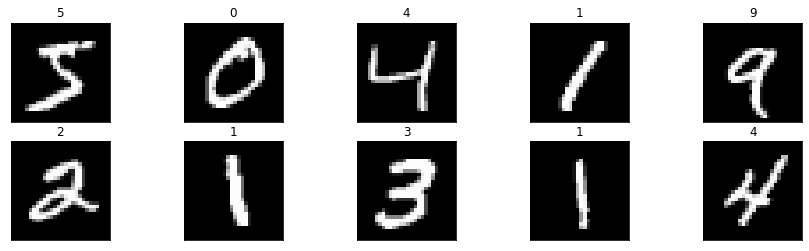

In [ ]:
import matplotlib.pyplot as plt
    
images, digits = iter(train_loader).next()
images = images.numpy()

fig = plt.figure(figsize=(15, 4))
for i in np.arange(10):
    sub_plot = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
    sub_plot.imshow(np.squeeze(images[i]), cmap='gray')
    sub_plot.set_title(str(digits[i].item()))

In [ ]:
#images[1].shape

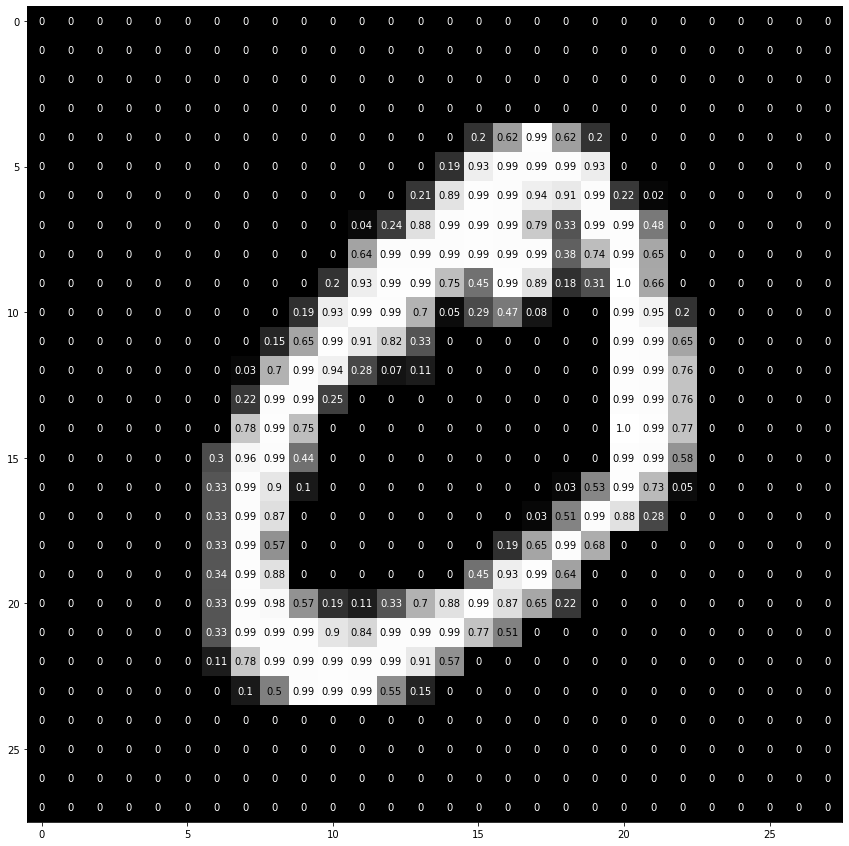

In [ ]:
img = np.squeeze(images[1])

plt.figure(figsize = (15,15))
plt.imshow(img, cmap='gray')
width_px, height_px = img.shape
for x in range(width_px):
    for y in range(height_px):
        value = round(img[x][y],2) if img[x][y] !=0 else 0
        value = str(value)
        if img[x][y]<0.5:
          plt.annotate(value, xy=(y,x), horizontalalignment='center', verticalalignment='center', color='white')
        else:
          plt.annotate(value, xy=(y,x), horizontalalignment='center', verticalalignment='center', color='black')

In [ ]:
import torch.nn as nn
import torch.nn.functional as function

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 256) # width_px * height_px = 28*28 = 784
        self.fc2 = nn.Linear(256,64)
        self.fc3 = nn.Linear(64,10)
        self.drop = nn.Dropout(p=0.3)

    def forward(self, x):
        x = x.view(-1, 784)  # flatten image
        x = self.drop(function.relu(self.fc1(x))) 
        x = self.drop(function.relu(self.fc2(x)))
        x = self.fc3(x)
        return x

model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (drop): Dropout(p=0.3, inplace=False)
)


In [ ]:
loss_func = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
train_loader.dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
n_iter = 100

model.train()

losses = []

for epoch in range(n_iter):
    train_loss = 0.0
    for images, digits in train_loader:
        model_output = model(images)
        loss = loss_func(model_output, digits)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        train_loss += loss.item()*images.size(0)
        
    train_loss = train_loss/len(train_loader.dataset)
    losses.append(train_loss)

    print(f'Epoch: {epoch+1} \t Training Loss : {train_loss:.5f}')

Epoch: 1 	 Training Loss : 0.40690
Epoch: 2 	 Training Loss : 0.18692
Epoch: 3 	 Training Loss : 0.14052
Epoch: 4 	 Training Loss : 0.11603
Epoch: 5 	 Training Loss : 0.09969
Epoch: 6 	 Training Loss : 0.08894
Epoch: 7 	 Training Loss : 0.07828
Epoch: 8 	 Training Loss : 0.07324
Epoch: 9 	 Training Loss : 0.06559
Epoch: 10 	 Training Loss : 0.06294
Epoch: 11 	 Training Loss : 0.05693
Epoch: 12 	 Training Loss : 0.05501
Epoch: 13 	 Training Loss : 0.05311
Epoch: 14 	 Training Loss : 0.04806
Epoch: 15 	 Training Loss : 0.04662
Epoch: 16 	 Training Loss : 0.04328
Epoch: 17 	 Training Loss : 0.04420
Epoch: 18 	 Training Loss : 0.04319
Epoch: 19 	 Training Loss : 0.04016
Epoch: 20 	 Training Loss : 0.03756
Epoch: 21 	 Training Loss : 0.03693
Epoch: 22 	 Training Loss : 0.03721
Epoch: 23 	 Training Loss : 0.03530
Epoch: 24 	 Training Loss : 0.03700
Epoch: 25 	 Training Loss : 0.03602
Epoch: 26 	 Training Loss : 0.03495
Epoch: 27 	 Training Loss : 0.03377
Epoch: 28 	 Training Loss : 0.03179
E

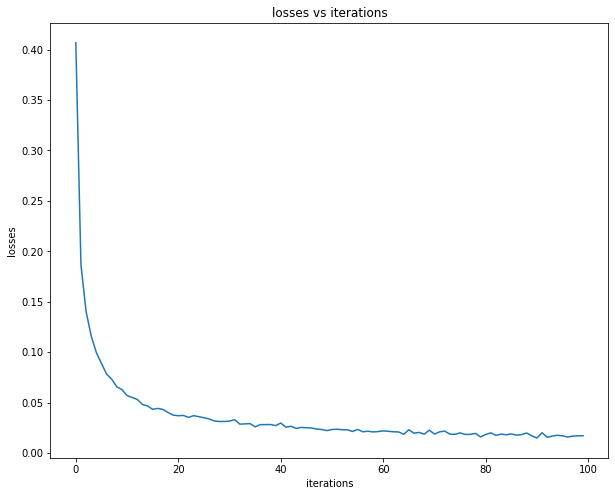

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(losses)
plt.title("losses vs iterations")
plt.xlabel('iterations')
plt.ylabel('losses')
plt.show()

In [ ]:
# images, digits = iter(train_loader).next()
# _,x = torch.max(model(images),1)
# correct = x.eq(digits)
# correct.shape
# x = np.zeros(10)
# x

In [ ]:
test_loss = 0.0
class_correct = np.zeros(10)
class_total = np.zeros(10)

model.eval()

for images, digits in test_loader:
    model_output = model(images)
    loss = loss_func(model_output, digits)
    test_loss += loss.item()*images.size(0)
 
    _, digits_pred = torch.max(model_output, 1)
    right_pred = digits_pred.eq(digits)

    for i in range(len(digits)):
        label = digits[i].item()
        class_correct[label] += right_pred[i].item()
        class_total[label] += 1

test_loss = test_loss/len(test_loader.dataset)
print(f'Test Loss: {test_loss:.5f}\n')

for i in range(10):
    if class_total[i] > 0:
      print(f'Test accuracy of {i}: {(class_correct[i]/class_total[i])*100:.2f}% ({int(class_correct[i])}/{int(class_total[i])})')
    else:
      print(f'Test Accuracy of {i}: N/A (no training examples)')

print(f'\nTest accuracy of (Overall): {(np.sum(class_correct)/np.sum(class_total))*100:.2f}% ({int(np.sum(class_correct))}/{int(np.sum(class_total))})')

Test Loss: 0.10918

Test accuracy of 0: 99.18% (972/980)
Test accuracy of 1: 99.47% (1129/1135)
Test accuracy of 2: 98.55% (1017/1032)
Test accuracy of 3: 98.12% (991/1010)
Test accuracy of 4: 98.17% (964/982)
Test accuracy of 5: 98.77% (881/892)
Test accuracy of 6: 98.64% (945/958)
Test accuracy of 7: 97.86% (1006/1028)
Test accuracy of 8: 96.51% (940/974)
Test accuracy of 9: 97.62% (985/1009)

Test accuracy of (Overall): 98.30% (9830/10000)


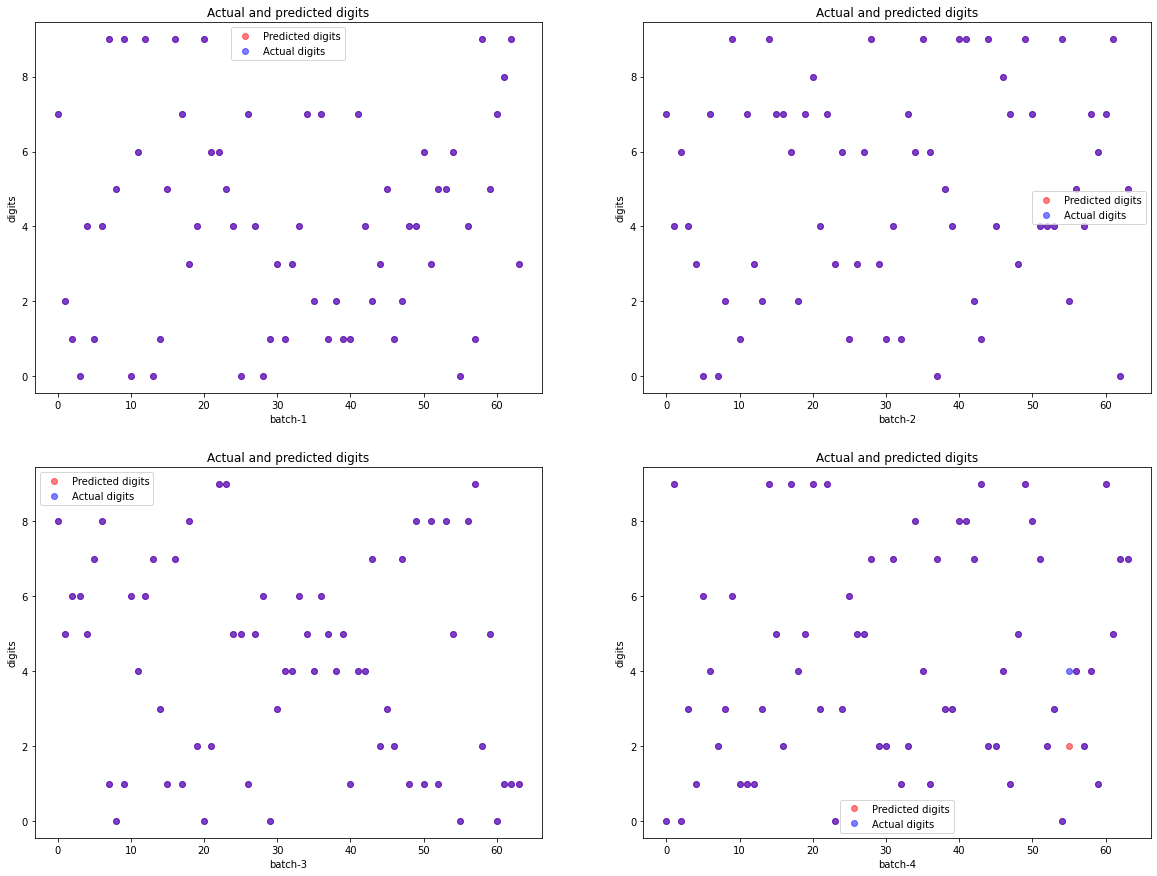

In [ ]:
# Graph for several batches
# due to high accuracy very few predictions are wrong others are overlapping
iterator = iter(test_loader)
fig = plt.figure(figsize = (20,15))
for i in range(4):
  images,digits = next(iterator)
  model_output = model(images)
  _,digits_pred = torch.max(model_output,1)

  ax = fig.add_subplot(2, 2, i+1)
  ax.plot(digits_pred, 'ro', label='Predicted digits', alpha=0.5)
  ax.plot(digits, 'bo', label='Actual digits',alpha=0.5)
  ax.set_title('Actual and predicted digits')
  ax.set_xlabel(f'batch-{i+1}')
  ax.set_ylabel('digits')
  ax.legend()